<a href="https://colab.research.google.com/github/ayaazzara/ProjectIntroductiontoMachineLearning/blob/main/Condensed_Nearest_Neighbors_Project_UTS_Kelompok_4_PPM_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
dataset = files.upload()

Saving lama.csv to lama.csv


In [ ]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('lama.csv',delimiter=';')

In [ ]:
data.head()

,Index,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
0,0,0.736626,0.597937,1.535647,0.781507,4.062768,1.828305,0.913014,0.842583,2.0085,4.7122,6.6631,12.4585,20.4063,30.8238,1
1,1,0.694672,0.516291,1.806776,0.699669,4.372226,1.805135,0.860493,0.823922,2.0945,5.0521,6.7158,14.1530,25.4531,41.2382,1
2,2,0.716667,0.547966,1.690245,0.734749,4.243978,1.816461,0.892896,0.826502,2.1296,5.0518,6.8320,13.4940,24.6055,40.1646,1
3,3,0.673077,0.548412,1.763861,0.697036,4.242250,1.767403,0.875309,0.847430,1.9192,4.7676,7.2061,15.1770,24.5586,39.6899,1
4,4,0.728216,0.548810,1.674075,0.744214,4.240712,1.826158,0.894028,0.822953,2.2200,5.1391,7.2910,14.2070,25.6758,44.7681,1


In [ ]:
data = data.drop('Index',1) 

In [ ]:
data.head()

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
0,0.736626,0.597937,1.535647,0.781507,4.062768,1.828305,0.913014,0.842583,2.0085,4.7122,6.6631,12.4585,20.4063,30.8238,1
1,0.694672,0.516291,1.806776,0.699669,4.372226,1.805135,0.860493,0.823922,2.0945,5.0521,6.7158,14.1530,25.4531,41.2382,1
2,0.716667,0.547966,1.690245,0.734749,4.243978,1.816461,0.892896,0.826502,2.1296,5.0518,6.8320,13.4940,24.6055,40.1646,1
3,0.673077,0.548412,1.763861,0.697036,4.242250,1.767403,0.875309,0.847430,1.9192,4.7676,7.2061,15.1770,24.5586,39.6899,1
4,0.728216,0.548810,1.674075,0.744214,4.240712,1.826158,0.894028,0.822953,2.2200,5.1391,7.2910,14.2070,25.6758,44.7681,1


In [ ]:
data.describe(include='all')

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.801144,0.528114,1.599129,0.799486,4.345408,1.924899,0.893682,0.802048,2.031075,4.603964,5.629309,11.214201,19.134376,32.019782,2.131868
std,0.088447,0.060964,0.105854,0.062509,0.262586,0.110104,0.026149,0.040450,0.419925,0.812382,1.026596,1.628785,3.474921,4.686773,0.805658
min,0.545259,0.376311,1.388612,0.623965,3.843622,1.693182,0.800360,0.697402,1.239000,2.301500,3.374000,7.064800,10.996100,22.261100,1.000000
25%,0.736313,0.494571,1.512613,0.756900,4.194137,1.835048,0.883068,0.783233,1.730600,4.318100,4.758800,10.350200,16.539100,28.797650,2.000000
50%,0.805930,0.524788,1.585444,0.792849,4.336685,1.924791,0.895081,0.796913,1.990200,4.779000,5.637700,11.261500,19.214800,31.632200,2.000000
75%,0.868840,0.561067,1.664582,0.853497,4.467204,1.984174,0.909719,0.831337,2.283700,5.048050,6.563000,12.391050,21.427700,34.916700,2.000000
max,0.960714,0.668065,1.895543,0.915760,5.121258,2.221936,0.949919,0.901396,3.231700,6.438400,7.871100,15.177000,26.480500,45.448300,4.000000


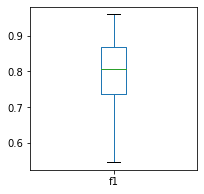

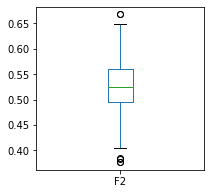

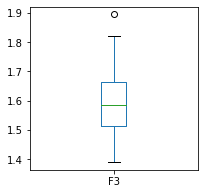

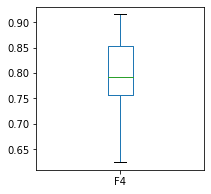

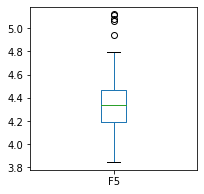

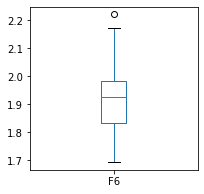

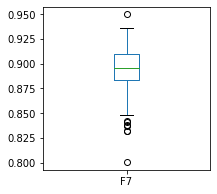

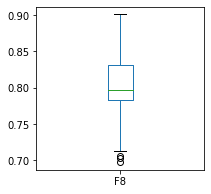

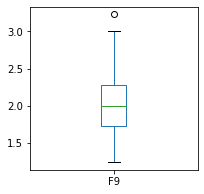

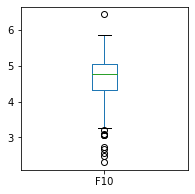

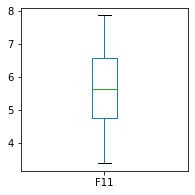

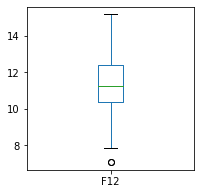

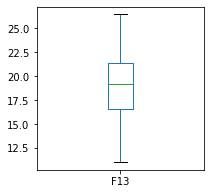

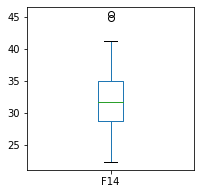

In [ ]:
from matplotlib import pyplot as plt
for i in data.columns[:-1]:
  plt.figure(figsize = (3,3))
  data[i].plot(kind='box',subplots=True, sharex=False, sharey=False)
plt.show()

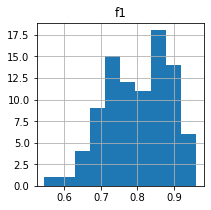

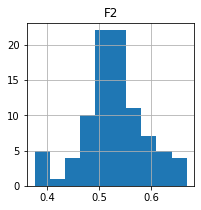

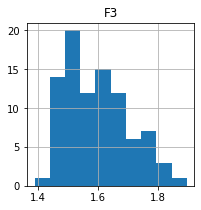

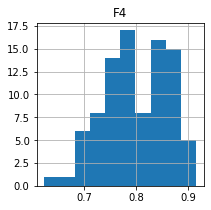

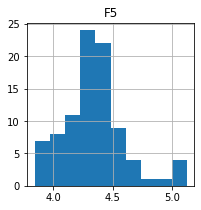

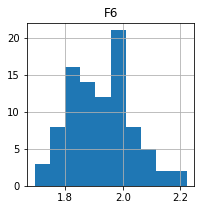

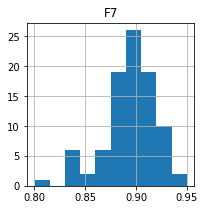

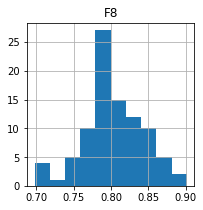

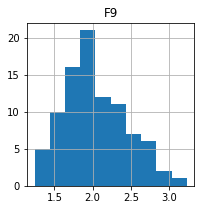

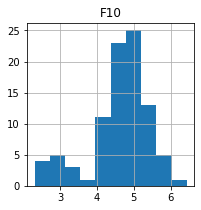

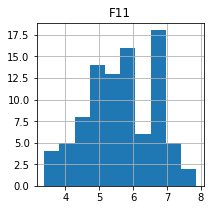

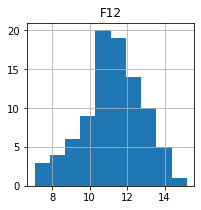

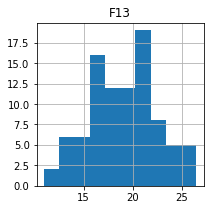

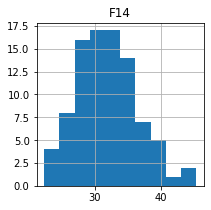

In [ ]:
for i in data.columns[:-1]:
  plt.figure(figsize = (3,3))
  data[i].hist()
  plt.title(label = i)
plt.show()

In [ ]:
print(data.groupby('Label').size())

Label
1    15
2    58
3     9
4     9
dtype: int64


In [ ]:
data

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
0,0.736626,0.597937,1.535647,0.781507,4.062768,1.828305,0.913014,0.842583,2.0085,4.7122,6.6631,12.4585,20.4063,30.8238,1
1,0.694672,0.516291,1.806776,0.699669,4.372226,1.805135,0.860493,0.823922,2.0945,5.0521,6.7158,14.1530,25.4531,41.2382,1
2,0.716667,0.547966,1.690245,0.734749,4.243978,1.816461,0.892896,0.826502,2.1296,5.0518,6.8320,13.4940,24.6055,40.1646,1
3,0.673077,0.548412,1.763861,0.697036,4.242250,1.767403,0.875309,0.847430,1.9192,4.7676,7.2061,15.1770,24.5586,39.6899,1
4,0.728216,0.548810,1.674075,0.744214,4.240712,1.826158,0.894028,0.822953,2.2200,5.1391,7.2910,14.2070,25.6758,44.7681,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.769697,0.522658,1.629506,0.775509,4.345515,1.904273,0.887588,0.796931,1.7820,3.0889,5.1602,9.0788,17.0703,28.8792,4
87,0.728571,0.493510,1.668296,0.745684,4.471999,1.929163,0.879280,0.785856,1.3904,2.3015,4.0264,7.0648,17.1914,25.8266,4
88,0.771028,0.559942,1.715493,0.756477,4.198348,1.793282,0.876324,0.839501,1.5364,2.6786,4.0938,7.1103,16.2148,26.9172,4
89,0.545259,0.561321,1.783165,0.623965,4.193187,1.693182,0.903109,0.892255,1.5095,2.7215,4.7344,8.6599,18.5391,31.8892,4


In [ ]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur :
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [ ]:
data_normal = minmax(data)

In [ ]:
data_normal

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
0,0.460619,0.759635,0.290048,0.539905,0.171525,0.255550,0.753237,0.711692,0.386159,0.582731,0.731382,0.664887,0.607721,0.369286,1
1,0.359638,0.479789,0.824893,0.259442,0.413736,0.211731,0.402066,0.620216,0.429317,0.664894,0.743101,0.873770,0.933649,0.818430,1
2,0.412578,0.588356,0.595017,0.379662,0.313357,0.233150,0.618727,0.632864,0.446931,0.664821,0.768940,0.792535,0.878910,0.772129,1
3,0.307658,0.589887,0.740237,0.250418,0.312004,0.140369,0.501133,0.735454,0.341346,0.596123,0.852127,1.000000,0.875882,0.751656,1
4,0.440377,0.591250,0.563119,0.412099,0.310801,0.251490,0.626292,0.615464,0.492297,0.685924,0.871006,0.880427,0.948032,0.970665,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.540222,0.501611,0.475201,0.519350,0.392829,0.399224,0.583235,0.487900,0.272495,0.190336,0.397189,0.248268,0.392279,0.285420,4
87,0.441233,0.401708,0.551720,0.417136,0.491828,0.446297,0.527687,0.433611,0.075977,0.000000,0.145071,0.000000,0.400099,0.153770,4
88,0.543426,0.629404,0.644824,0.454125,0.277642,0.189313,0.507923,0.696585,0.149245,0.091155,0.160059,0.005609,0.337030,0.200805,4
89,0.000000,0.634132,0.778317,0.000000,0.273603,0.000000,0.687013,0.955191,0.135745,0.101525,0.302506,0.196630,0.487135,0.415233,4


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_normal, test_size = 0.3, train_size = 0.7)

In [ ]:
data_train.shape[0]

63

In [ ]:
data_test.shape[0]

28

In [ ]:
label_uji = data_test.copy().pop('Label')

In [ ]:
data_test.head()

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
10,0.495288,0.931528,0.239338,0.588886,0.046014,0.151994,0.904211,0.823581,0.257891,0.455365,0.522692,0.566788,0.774470,0.622524,1
3,0.307658,0.589887,0.740237,0.250418,0.312004,0.140369,0.501133,0.735454,0.341346,0.596123,0.852127,1.000000,0.875882,0.751656,1
65,0.775186,0.326774,0.244455,0.789913,0.572032,0.756560,0.552662,0.323797,0.309981,0.628393,0.503369,0.707416,0.321898,0.283518,2
64,0.763775,0.535474,0.156190,0.826076,0.361132,0.578982,0.781321,0.430503,0.357405,0.564916,0.429966,0.518232,0.533298,0.486592,2
43,0.899983,0.605882,0.151877,0.924053,0.297967,0.517711,0.820422,0.477569,0.407738,0.624429,0.374375,0.425199,0.290867,0.208072,2


In [ ]:
data_train.head()

,f1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Label
69,0.879238,0.566484,0.177985,0.895992,0.332869,0.539335,0.733851,0.458153,0.346113,0.599990,0.310756,0.406622,0.256813,0.243311,2
32,0.897377,0.509494,0.289870,0.851723,0.385371,0.527970,0.699287,0.418570,0.440809,0.628248,0.471015,0.475753,0.475530,0.386463,2
76,0.624648,0.259378,0.790915,0.454865,0.649083,0.503156,0.273287,0.330546,0.730968,0.823950,0.626493,0.480166,0.612513,0.500401,3
27,0.687107,1.000000,0.119454,0.789460,0.000000,0.190042,0.887222,0.841149,0.250565,0.524982,0.288831,0.415966,0.353685,0.328185,2
44,0.817078,0.588396,0.324609,0.780206,0.313321,0.424533,0.744428,0.520262,0.382396,0.586284,0.439528,0.412071,0.395559,0.245079,2


In [ ]:
data_train_np = data_train.to_numpy()
print(data_train_np)

[[8.79238246e-01 5.66484260e-01 1.77984763e-01 8.95991988e-01
  3.32868838e-01 5.39335490e-01 7.33850595e-01 4.58152603e-01
  3.46113314e-01 5.99990331e-01 3.10755820e-01 4.06622125e-01
  2.56813309e-01 2.43310965e-01 2.00000000e+00]
 [8.97377281e-01 5.09493613e-01 2.89869504e-01 8.51722836e-01
  3.85370987e-01 5.27970060e-01 6.99286850e-01 4.18569724e-01
  4.40808953e-01 6.28248205e-01 4.71014654e-01 4.75752570e-01
  4.75530211e-01 3.86463221e-01 2.00000000e+00]
 [6.24648151e-01 2.59377960e-01 7.90914888e-01 4.54864747e-01
  6.49083212e-01 5.03155577e-01 2.73286978e-01 3.30546049e-01
  7.30968033e-01 8.23950301e-01 6.26492629e-01 4.80165676e-01
  6.12513239e-01 5.00401083e-01 3.00000000e+00]
 [6.87106727e-01 1.00000000e+00 1.19454226e-01 7.89459527e-01
  0.00000000e+00 1.90041775e-01 8.87222391e-01 8.41149056e-01
  2.50564561e-01 5.24982475e-01 2.88830580e-01 4.15966076e-01
  3.53684999e-01 3.28185378e-01 2.00000000e+00]
 [8.17078467e-01 5.88396368e-01 3.24608949e-01 7.80205917e-01
  

In [ ]:
data_test_np = data_test.to_numpy()
print(data_test_np)

[[0.49528795 0.9315276  0.23933762 0.588886   0.04601436 0.15199422
  0.90421113 0.82358124 0.2578913  0.45536513 0.5226924  0.56678829
  0.77446979 0.6225245  1.        ]
 [0.3076581  0.58988684 0.74023729 0.25041757 0.31200421 0.14036939
  0.50113262 0.73545364 0.34134591 0.5961227  0.85212693 1.
  0.87588153 0.75165609 1.        ]
 [0.77518571 0.32677352 0.24445522 0.7899128  0.57203199 0.75656036
  0.55266167 0.32379712 0.30998143 0.62839324 0.50336884 0.70741599
  0.32189817 0.28351849 2.        ]
 [0.76377458 0.53547433 0.15619005 0.82607554 0.36113157 0.57898231
  0.78132087 0.43050325 0.35740453 0.56491576 0.42996598 0.5182318
  0.53329803 0.48659174 2.        ]
 [0.89998305 0.60588183 0.15187672 0.92405321 0.29796664 0.51771085
  0.82042188 0.4775691  0.40773824 0.62442892 0.3743746  0.42519908
  0.29086694 0.20807169 2.        ]
 [0.54524617 0.5219297  0.34447341 0.57877647 0.37370335 0.45473323
  0.70399819 0.48413276 0.79244241 0.84737364 0.8662249  0.77722443
  0.76790835 

In [ ]:
import numpy as np 
 
class Knn:
  def __init__(self, k):
    self.__k = k
 
  def prediksi_data(self, data_train, data_test):
    jumlah_data_train = np.size(data_train,0)
    jumlah_kolom_train = np.size(data_train,1)
    index_kelas_data = None
    index_kelas_data = jumlah_kolom_train - 1
    
    kelas_dan_jarak = np.zeros((jumlah_data_train, 2))
 
    neighbors = None

    for baris in range(0, jumlah_data_train):
      kelas_dan_jarak[baris,0] = data_train[baris,index_kelas_data]
      temp_data_train = np.copy(data_train[baris,:])
      temp_data_test = np.copy(data_test)
      temp_data_train= np.delete(temp_data_train,[0,index_kelas_data])
      temp_data_test = np.delete(temp_data_test,[0,index_kelas_data])
      jarak = np.linalg.norm(temp_data_test  - temp_data_train)
      kelas_dan_jarak[baris,1] = jarak   
 
    kelas_dan_jarak = kelas_dan_jarak[kelas_dan_jarak[:,1].argsort()]
    k = self.__k
    neighbors = kelas_dan_jarak[:k,:]
    neighbors = neighbors [:,0]
    neighborsint = neighbors.astype(int)
    prediksi = np.bincount(neighborsint).argmax()
 
    return prediksi

In [ ]:
import numpy as np 

class CondensedKnn:
  def __init__(self, data_train):
    self.__data_train = data_train
 
  def get_trainingset(self):
         
    condensed_data_train = np.copy(self.__data_train)
    jumlah_data_train = np.size(condensed_data_train,0)
    jumlah_kolom_train = np.size(condensed_data_train,1)
 
    print("\njumlah data sebelum Kondensasi : " + str(jumlah_data_train) + " data latih\n")

    index_kelas_data = jumlah_kolom_train - 1
    temporary_hasil = np.copy(condensed_data_train[0,:])
    baris_baru = np.copy(condensed_data_train[0,:])
    temporary_hasil = np.vstack([temporary_hasil,baris_baru])
 
    baris = 1
    while baris < jumlah_data_train:
      kelas_sebenarnya= condensed_data_train[baris,index_kelas_data]
      knn1 = Knn(1)
      this_instance = condensed_data_train[baris,:]
      prediction = knn1.prediksi_data(temporary_hasil,this_instance)

      if kelas_sebenarnya!= prediction:
        baris_baru = np.copy(this_instance)
        temporary_hasil = np.vstack([temporary_hasil,baris_baru])
        condensed_data_train = np.delete(condensed_data_train, baris, 0)
        jumlah_data_train -= 1
        
      baris += 1
 
    no_more_transfers_to_temporary_hasil = False
    no_more_instances_left = None
    jumlah_data_train = np.size(condensed_data_train,0)

    if jumlah_data_train > 0:
      no_more_instances_left = False
    else:
      no_more_instances_left = True
 
    while not(no_more_transfers_to_temporary_hasil) and not(no_more_instances_left):
      transfers_made = 0
      baris = 0
      while baris < jumlah_data_train:
        kelas_sebenarnya= condensed_data_train[baris,index_kelas_data]
        knn1 = Knn(1) 
        this_instance = condensed_data_train[baris,:]

        prediction = knn1.prediksi_data(temporary_hasil,this_instance)

        if kelas_sebenarnya!= prediction:
          baris_baru = np.copy(this_instance)
          temporary_hasil = np.vstack([temporary_hasil,baris_baru])
 
          condensed_data_train = np.delete(condensed_data_train, baris, 0)
          jumlah_data_train -= 1
          transfers_made += 1
             
        baris += 1
         
      jumlah_data_train = np.size(condensed_data_train,0)
 
      if jumlah_data_train > 0:
        no_more_instances_left = False
      else:
        no_more_instances_left = True
 
      if transfers_made > 0:
        no_more_transfers_to_temporary_hasil = False
      else: 
        no_more_transfers_to_temporary_hasil = True

    temporary_hasil = np.delete(temporary_hasil,0,0)

    print("Setelah proses Kondensasi : " + str(np.size(temporary_hasil,0)) + " data latih\n")
    return temporary_hasil

In [ ]:
np_data_set = data.to_numpy(copy=True)
cknn = CondensedKnn(data_train_np)
training_dataset = cknn.get_trainingset()


jumlah data sebelum Kondensasi : 63 data latih

Setelah proses Kondensasi : 20 data latih



In [ ]:
knn = Knn(3)
hasil_prediksi = []
for i in range(data_test.shape[0]):
  label_prediksi = knn.prediksi_data(training_dataset, data_test_np[i])
  hasil_prediksi.append(label_prediksi)

In [ ]:
def cek_hasil(kelas_uji,label_uji):
  cek = sum(kelas_uji == label_uji)
  jumlah_kls_uji = kelas_uji.shape[0]
  print('Jumlah label data uji yang dibandingkan:',jumlah_kls_uji)
  print('Jumlah label hasil klasifikasi yang sama:',cek)
  print('Akurasi: ', cek/jumlah_kls_uji)

In [ ]:
print(hasil_prediksi)

[1, 1, 2, 2, 2, 2, 2, 2, 3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 4, 2]


In [ ]:
cek_hasil(label_uji, hasil_prediksi)

Jumlah label data uji yang dibandingkan: 28
Jumlah label hasil klasifikasi yang sama: 26
Akurasi:  0.9285714285714286
